In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [2]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.05, random_state = 0)
x_val=x_val.reshape((3000, 28, 28,1))

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
def normalize(data):
 data = data.astype("float32")
 data = data/255.0
 return data

In [4]:
x_val = normalize(x_val)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (57000, 28, 28, 1)
Number of images in x_train 57000
Number of images in x_test 10000


In [6]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(input_shape)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
r = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_val, y_val)) 

Epoch 1/10
1782/1782 [==============================] - 29s 16ms/step - loss: 0.3858 - accuracy: 0.8838 - val_loss: 0.0850 - val_accuracy: 0.9730
Epoch 2/10
1782/1782 [==============================] - 28s 16ms/step - loss: 0.0934 - accuracy: 0.9713 - val_loss: 0.0679 - val_accuracy: 0.9790
Epoch 3/10
1782/1782 [==============================] - 29s 16ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0531 - val_accuracy: 0.9827
Epoch 4/10
1782/1782 [==============================] - 29s 16ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0565 - val_accuracy: 0.9830
Epoch 5/10
1782/1782 [==============================] - 30s 17ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0537 - val_accuracy: 0.9840
Epoch 6/10
1782/1782 [==============================] - 29s 16ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.0409 - val_accuracy: 0.9863
Epoch 7/10
1782/1782 [==============================] - 29s 17ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0604 -

313/313 [==============================] - 2s 6ms/step - loss: 0.0559 - accuracy: 0.9858
test set loss :  0.05586255341768265
test set accuracy : 98.580002784729


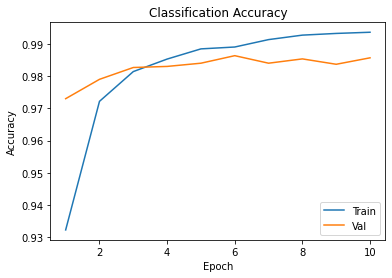

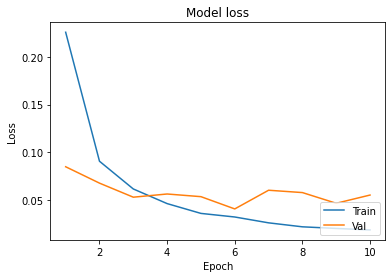

In [9]:
acc = model.evaluate(x_test, y_test)
print("test set loss : ", acc[0])
print("test set accuracy :", acc[1]*100)
epoch_range = range(1, 11)
plt.plot(epoch_range, r.history['accuracy'])
plt.plot(epoch_range, r.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# Plot training & validation loss values
plt.plot(epoch_range,r.history['loss'])
plt.plot(epoch_range, r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [10]:
classes = range(10)
def predict_class(filename, model):
  img = load_img(filename,target_size=( 28 , 28, 3)) # Lectura como imagen a color
  plt.imshow(img,cmap='Greys')
  img = img_to_array(img) 
  img = np.mean(img, axis=2)  # Promedio de los 3 canales en un solo canal
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  result = model.predict(img)
  dict2 = {}
  for i in range(10):
    dict2[result[0][i]] = classes[i]
  res = result[0]
  res.sort()
  res = res[::-1]
  results = res[:3]
  print("Top predictions of these images are")
  for i in range(3):
    print("{} : {}".format(dict2[results[i]],
                           (results[i]*100).round(2)))
  print('The image given as input is')

Top predictions of these images are
1 : 100.0
2 : 0.0
5 : 0.0
The image given as input is


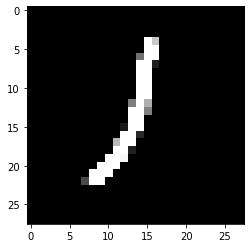

In [22]:
predict_class("/content/1.png", model)

Top predictions of these images are
2 : 100.0
3 : 0.0
1 : 0.0
The image given as input is


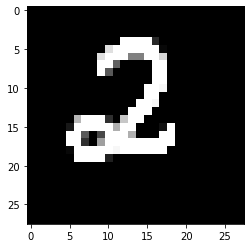

In [30]:
predict_class("/content/2.png", model)

Top predictions of these images are
3 : 99.91
2 : 0.07
8 : 0.02
The image given as input is


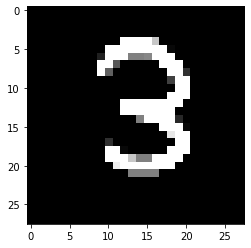

In [29]:
predict_class("/content/3.png", model)

Top predictions of these images are
5 : 100.0
9 : 0.0
3 : 0.0
The image given as input is


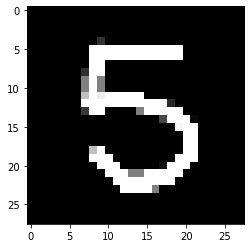

In [27]:
predict_class("/content/5.png", model)

Top predictions of these images are
6 : 99.41
5 : 0.59
9 : 0.0
The image given as input is


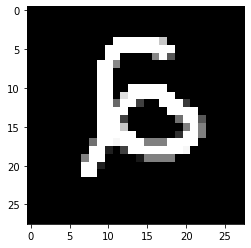

In [26]:
predict_class("/content/6.png", model)

Top predictions of these images are
3 : 98.58
7 : 1.42
2 : 0.0
The image given as input is


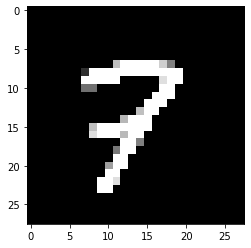

In [25]:
predict_class("/content/7.png", model)

Top predictions of these images are
8 : 100.0
9 : 0.0
3 : 0.0
The image given as input is


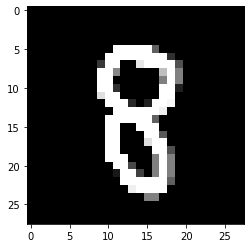

In [24]:
predict_class("/content/8.png", model)

Top predictions of these images are
9 : 99.89
8 : 0.06
3 : 0.03
The image given as input is


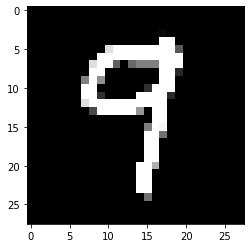

In [23]:
predict_class("/content/9.png", model)